In [1]:
import numpy as np

# Matriz A (modificada para evitar determinante próximo de zero)
A = np.array([[1, 1.000001],
              [1, 1]], dtype=float)

print("Matriz A:\n", A)

# Verificando o determinante antes de calcular a inversa
determinante = np.linalg.det(A)
print("Determinante de A:", determinante)

if abs(determinante) < 1e-10:
    print("A matriz A é praticamente singular e não pode ser invertida.")
else:
    # Cálculo da inversa
    Inversa = np.linalg.inv(A)
    print("A inversa de A é:\n", Inversa)

    # Cálculo da norma infinito
    norma1 = np.linalg.norm(A, np.inf)
    norma2 = np.linalg.norm(Inversa, np.inf)

    print("Norma infinito de A:", norma1)
    print("Norma infinito da inversa de A:", norma2)

    # Cálculo do número de condicionamento
    condicionamento = norma1 * norma2
    numero_condicionamento = np.linalg.cond(A)

    print("Número de Condicionamento (usando norma infinito):", condicionamento)
    print("Número de Condicionamento (usando função cond do NumPy):", numero_condicionamento)

Matriz A:
 [[1.       1.000001]
 [1.       1.      ]]
Determinante de A: -9.999999999177338e-07
A inversa de A é:
 [[-1000000.00008227  1000001.00008227]
 [ 1000000.00008227 -1000000.00008227]]
Norma infinito de A: 2.000001
Norma infinito da inversa de A: 2000001.0001645333
Número de Condicionamento (usando norma infinito): 4000004.000330067
Número de Condicionamento (usando função cond do NumPy): 4000002.000582194


In [2]:
import numpy as np # Ax=b, então x=inv(A).b
A = np.array( ( (2,-1,1) , (4,-7,11) , (3,-4,7) ) )
print("Matriz A:", A)

print("--------------------------------------------------")
Determinante = np.linalg.det(A)
print("O determinante de A é \n: ", Determinante)

print("--------------------------------------------------")

if (Determinante != 0):
    print("A matriz A é não singular, então é possível encontrar a decomposição LU")
    u11=A[0,0]
    u12=A[0,1]
    u13=A[0,2]
    u21=0
    l21=((A[1,0]/u11))
    u22=A[1,1]-l21*u12
    u23=A[1,2]-l21*u13
    u31=0
    u32=0
    l31=(A[2,0]/(u11))
    l32=((A[2,1]-l31*u12)/(u22)) #l[k,i] = (A[k,i]-l[k,j]*U[j,i]/U[i,i]) regra para criar o caso nxn
    u33=A[2,2]-l31*u13-l32*u23 # U[i,k] = A[i,k] - L[i,j]*U[j,k] regra par criar o caso nxn
    U = ( (u11,u12,u13) , (u21,u22,u23), (u31,u32,u33) )
    print("A matriz U é:", U)
    l11=1
    l12=0
    l13=0
    l22=1
    l23=0
    l33=1
    L = ( (l11,l12,l13) , (l21,l22,l23), (l31,l32,l33) )
    print("A matriz L com diagonal unitária é:", L)
else:
    print("A matriz A tem determinante zero e não é possível encontrar sua decomposição LU")

# Solução de um sistema liner Ax=b; (LU)x=b;Ux=y;Ly=b
print("--------------------------------------------------")
Inversa1 = np.linalg.inv(L)
print("A inversa de L é \n: ", Inversa1)

print("--------------------------------------------------")

Inversa2 = np.linalg.inv(U)
print("A inversa de U é \n: ", Inversa2)

print("--------------------------------------------------")

b = np.array((3800,1200,2350))

print("--------------------------------------------------")

#y=b.dot(InvL)
y = np.dot(Inversa1, b)
print(y)

print("--------------------------------------------------")
x=np.dot(Inversa2,y)
print(x)

Matriz A: [[ 2 -1  1]
 [ 4 -7 11]
 [ 3 -4  7]]
--------------------------------------------------
O determinante de A é 
:  -10.000000000000002
--------------------------------------------------
A matriz A é não singular, então é possível encontrar a decomposição LU
A matriz U é: ((2, -1, 1), (0, -5.0, 9.0), (0, 0, 1.0))
A matriz L com diagonal unitária é: ((1, 0, 0), (2.0, 1, 0), (1.5, 0.5, 1))
--------------------------------------------------
A inversa de L é 
:  [[ 1.   0.   0. ]
 [-2.   1.  -0. ]
 [-0.5 -0.5  1. ]]
--------------------------------------------------
A inversa de U é 
:  [[ 0.5 -0.1  0.4]
 [-0.  -0.2  1.8]
 [ 0.   0.   1. ]]
--------------------------------------------------
--------------------------------------------------
[ 3800. -6400.  -150.]
--------------------------------------------------
[2480. 1010. -150.]


In [11]:
import numpy as np

def lu_decomposition(A):
    n = A.shape[0]
    L = np.eye(n)  # L começa como matriz identidade (diagonal 1)
    U = np.zeros((n, n))

    for i in range(n):
        # Preenche a linha i da matriz U
        for k in range(i, n):
            U[i][k] = A[i][k] - sum(L[i][j] * U[j][k] for j in range(i))

        # Preenche a coluna i da matriz L
        for k in range(i+1, n):
            if U[i][i] == 0:
                raise ZeroDivisionError("Divisão por zero encontrada na decomposição LU.")
            L[k][i] = (A[k][i] - sum(L[k][j] * U[j][i] for j in range(i))) / U[i][i]

    return L, U

# Exemplo
A = np.array([[2, -1, 1, 3],
              [4, -7, 11, 8],
              [3, -4, 7, 6],
              [1, 2, 0, 5]], dtype=float)

print("Matriz A:")
print(A)
print("--------------------------------------------------")

det = np.linalg.det(A)
print(f"Determinante: {det}")

if det != 0:
    L, U = lu_decomposition(A)
    print("Matriz L:")
    print(L)
    print("--------------------------------------------------")
    print("Matriz U:")
    print(U)

    # Resolvendo Ax = b usando LU
    b = np.array([3800, 1200, 2350, 4200], dtype=float)  # <-- Agora b tem tamanho 4

    # Etapa 1: resolver Ly = b
    y = np.linalg.solve(L, b)

    # Etapa 2: resolver Ux = y
    x = np.linalg.solve(U, y)

    print("--------------------------------------------------")
    print("Solução x:")
    print(x)
else:
    print("A matriz A é singular (determinante zero). Não é possível aplicar decomposição LU.")


Matriz A:
[[ 2. -1.  1.  3.]
 [ 4. -7. 11.  8.]
 [ 3. -4.  7.  6.]
 [ 1.  2.  0.  5.]]
--------------------------------------------------
Determinante: -24.999999999999996
Matriz L:
[[ 1.   0.   0.   0. ]
 [ 2.   1.   0.   0. ]
 [ 1.5  0.5  1.   0. ]
 [ 0.5 -0.5  4.   1. ]]
--------------------------------------------------
Matriz U:
[[ 2.  -1.   1.   3. ]
 [ 0.  -5.   9.   2. ]
 [ 0.   0.   1.   0.5]
 [ 0.   0.   0.   2.5]]
--------------------------------------------------
Solução x:
[2660. 1070.  -90. -120.]


2.375


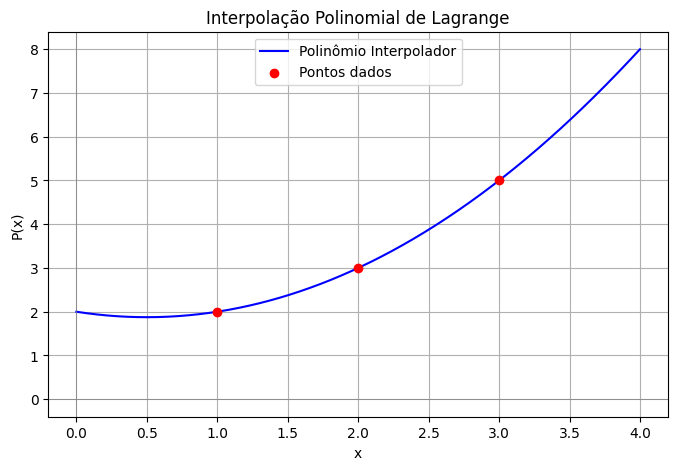

In [16]:
import matplotlib.pyplot as plt
import numpy as np

def lagrange_interpolacao(x_pontos, y_pontos, x):
    n = len(x_pontos)
    resultado = 0.0

    for j in range(n):
        termo = y_pontos[j]
        for m in range(n):
            if m != j:
                termo *= (x - x_pontos[m]) / (x_pontos[j] - x_pontos[m])
        resultado += termo

    return resultado

# Pontos conhecidos
x_vals = [1.0, 2.0, 3.0]
y_vals = [2.0, 3.0, 5.0]
print(lagrange_interpolacao(x_vals, y_vals, 1.5))
# Geração de pontos para o gráfico
x_plot = np.linspace(min(x_vals) - 1, max(x_vals) + 1, 500)
y_plot = [lagrange_interpolacao(x_vals, y_vals, x) for x in x_plot]

# Gráfico
plt.figure(figsize=(8, 5))
plt.plot(x_plot, y_plot, label='Polinômio Interpolador', color='blue')
plt.scatter(x_vals, y_vals, color='red', label='Pontos dados', zorder=5)
plt.title('Interpolação Polinomial de Lagrange')
plt.xlabel('x')
plt.ylabel('P(x)')
plt.grid(True)
plt.legend()
plt.axhline(0, color='gray', linewidth=0.5)
plt.axvline(0, color='gray', linewidth=0.5)
plt.show()
